# Time Series Prediction with Multilayer Perceptrons
Deep Learning with Python: Jason Brownlee, Page 184-194 of 255

# Problem Description: Time Series Prediction

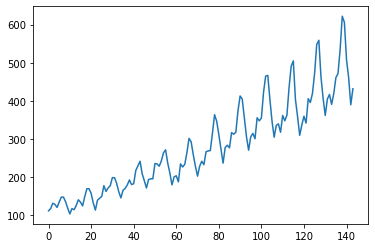




Execution (importing modules) took: 0:00:03 secs (Wall clock time)





In [1]:
import time
from datetime import timedelta

start_time = time.time()

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
plt.plot(dataset)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Multilayer Perceptron Regression

In [2]:
import numpy 
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu" ))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 1s - loss: 54746.0703 - 1s/epoch - 23ms/step
Epoch 2/200
47/47 - 0s - loss: 41234.0859 - 132ms/epoch - 3ms/step
Epoch 3/200
47/47 - 0s - loss: 29941.6914 - 119ms/epoch - 3ms/step
Epoch 4/200
47/47 - 0s - loss: 20380.9551 - 83ms/epoch - 2ms/step
Epoch 5/200
47/47 - 0s - loss: 12752.4531 - 134ms/epoch - 3ms/step
Epoch 6/200
47/47 - 0s - loss: 7202.4668 - 107ms/epoch - 2ms/step
Epoch 7/200
47/47 - 0s - loss: 3653.2727 - 95ms/epoch - 2ms/step
Epoch 8/200
47/47 - 0s - loss: 1774.5300 - 132ms/epoch - 3ms/step
Epoch 9/200
47/47 - 0s - loss: 951.3807 - 123ms/epoch - 3ms/step
Epoch 10/200
47/47 - 0s - loss: 652.3829 - 97ms/epoch - 2ms/step
Epoch 11/200
47/47 - 0s - loss: 569.5825 - 125ms/epoch - 3ms/step
Epoch 12/200
47/47 - 0s - loss: 542.7422 - 104ms/epoch - 2ms/step
Epoch 13/200
47/47 - 0s - loss: 546.4278 - 90ms/epoch - 2ms/step
Epoch 14/200
47/47 - 0s - loss: 540.0955 - 90ms/epoch - 2ms/step
Epoch 15/200
47/47 - 0s - loss: 545.7002 - 121ms/epoch - 3ms/step
Epoch 16/200


Epoch 126/200
47/47 - 0s - loss: 537.8168 - 91ms/epoch - 2ms/step
Epoch 127/200
47/47 - 0s - loss: 553.6490 - 106ms/epoch - 2ms/step
Epoch 128/200
47/47 - 0s - loss: 543.2379 - 104ms/epoch - 2ms/step
Epoch 129/200
47/47 - 0s - loss: 542.8002 - 86ms/epoch - 2ms/step
Epoch 130/200
47/47 - 0s - loss: 544.1396 - 95ms/epoch - 2ms/step
Epoch 131/200
47/47 - 0s - loss: 536.9671 - 113ms/epoch - 2ms/step
Epoch 132/200
47/47 - 0s - loss: 541.0943 - 103ms/epoch - 2ms/step
Epoch 133/200
47/47 - 0s - loss: 542.5917 - 84ms/epoch - 2ms/step
Epoch 134/200
47/47 - 0s - loss: 540.8277 - 113ms/epoch - 2ms/step
Epoch 135/200
47/47 - 0s - loss: 547.4167 - 128ms/epoch - 3ms/step
Epoch 136/200
47/47 - 0s - loss: 543.9670 - 96ms/epoch - 2ms/step
Epoch 137/200
47/47 - 0s - loss: 558.6934 - 110ms/epoch - 2ms/step
Epoch 138/200
47/47 - 0s - loss: 545.2352 - 112ms/epoch - 2ms/step
Epoch 139/200
47/47 - 0s - loss: 537.3603 - 93ms/epoch - 2ms/step
Epoch 140/200
47/47 - 0s - loss: 549.8567 - 86ms/epoch - 2ms/step
Ep

In [12]:
# Estimate model performance

trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print(" Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

Train Score: 535.98 MSE (23.15 RMSE)
 Test Score: 2377.36 MSE (48.76 RMSE)


2/2 [==============================] - 0s 3ms/step


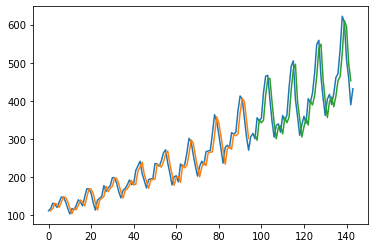

In [13]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

len(trainX)
len(trainPredict)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

96 48
Epoch 1/200
47/47 - 1s - loss: 8564.0264 - 708ms/epoch - 15ms/step
Epoch 2/200
47/47 - 0s - loss: 3886.4016 - 73ms/epoch - 2ms/step
Epoch 3/200
47/47 - 0s - loss: 1636.1760 - 67ms/epoch - 1ms/step
Epoch 4/200
47/47 - 0s - loss: 783.5964 - 84ms/epoch - 2ms/step
Epoch 5/200
47/47 - 0s - loss: 582.9639 - 93ms/epoch - 2ms/step
Epoch 6/200
47/47 - 0s - loss: 542.8638 - 87ms/epoch - 2ms/step
Epoch 7/200
47/47 - 0s - loss: 543.6544 - 76ms/epoch - 2ms/step
Epoch 8/200
47/47 - 0s - loss: 540.1228 - 122ms/epoch - 3ms/step
Epoch 9/200
47/47 - 0s - loss: 545.7076 - 86ms/epoch - 2ms/step
Epoch 10/200
47/47 - 0s - loss: 540.9657 - 73ms/epoch - 2ms/step
Epoch 11/200
47/47 - 0s - loss: 538.4488 - 93ms/epoch - 2ms/step
Epoch 12/200
47/47 - 0s - loss: 542.0067 - 117ms/epoch - 2ms/step
Epoch 13/200
47/47 - 0s - loss: 544.6035 - 94ms/epoch - 2ms/step
Epoch 14/200
47/47 - 0s - loss: 541.5985 - 96ms/epoch - 2ms/step
Epoch 15/200
47/47 - 0s - loss: 540.5547 - 108ms/epoch - 2ms/step
Epoch 16/200
47/47 -

Epoch 127/200
47/47 - 0s - loss: 544.8099 - 80ms/epoch - 2ms/step
Epoch 128/200
47/47 - 0s - loss: 545.4609 - 78ms/epoch - 2ms/step
Epoch 129/200
47/47 - 0s - loss: 543.4393 - 78ms/epoch - 2ms/step
Epoch 130/200
47/47 - 0s - loss: 539.5389 - 107ms/epoch - 2ms/step
Epoch 131/200
47/47 - 0s - loss: 538.5612 - 82ms/epoch - 2ms/step
Epoch 132/200
47/47 - 0s - loss: 543.1419 - 87ms/epoch - 2ms/step
Epoch 133/200
47/47 - 0s - loss: 535.3307 - 89ms/epoch - 2ms/step
Epoch 134/200
47/47 - 0s - loss: 540.6006 - 94ms/epoch - 2ms/step
Epoch 135/200
47/47 - 0s - loss: 549.5731 - 77ms/epoch - 2ms/step
Epoch 136/200
47/47 - 0s - loss: 538.8000 - 71ms/epoch - 2ms/step
Epoch 137/200
47/47 - 0s - loss: 541.6872 - 98ms/epoch - 2ms/step
Epoch 138/200
47/47 - 0s - loss: 552.0465 - 77ms/epoch - 2ms/step
Epoch 139/200
47/47 - 0s - loss: 549.9697 - 70ms/epoch - 1ms/step
Epoch 140/200
47/47 - 0s - loss: 535.1776 - 67ms/epoch - 1ms/step
Epoch 141/200
47/47 - 0s - loss: 554.9722 - 145ms/epoch - 3ms/step
Epoch 14

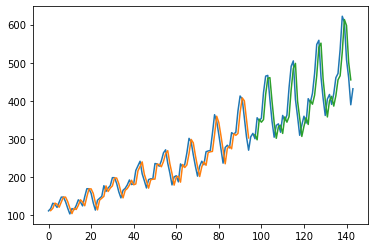




Execution (importing modules) took: 0:00:19 secs (Wall clock time)





In [14]:
import time
from datetime import timedelta

start_time = time.time()

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv' , usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print(" Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Multilayer Perceptron Using the Window Method

96 48
Epoch 1/200
43/43 - 1s - loss: 23776.2520 - 734ms/epoch - 17ms/step
Epoch 2/200
43/43 - 0s - loss: 3091.4155 - 91ms/epoch - 2ms/step
Epoch 3/200
43/43 - 0s - loss: 2271.1287 - 74ms/epoch - 2ms/step
Epoch 4/200
43/43 - 0s - loss: 2246.5752 - 68ms/epoch - 2ms/step
Epoch 5/200
43/43 - 0s - loss: 2195.5574 - 75ms/epoch - 2ms/step
Epoch 6/200
43/43 - 0s - loss: 1997.1798 - 136ms/epoch - 3ms/step
Epoch 7/200
43/43 - 0s - loss: 1823.5891 - 90ms/epoch - 2ms/step
Epoch 8/200
43/43 - 0s - loss: 1732.8590 - 82ms/epoch - 2ms/step
Epoch 9/200
43/43 - 0s - loss: 1634.9965 - 132ms/epoch - 3ms/step
Epoch 10/200
43/43 - 0s - loss: 1532.6122 - 84ms/epoch - 2ms/step
Epoch 11/200
43/43 - 0s - loss: 1383.7841 - 78ms/epoch - 2ms/step
Epoch 12/200
43/43 - 0s - loss: 1307.5724 - 87ms/epoch - 2ms/step
Epoch 13/200
43/43 - 0s - loss: 1212.6094 - 97ms/epoch - 2ms/step
Epoch 14/200
43/43 - 0s - loss: 1172.5155 - 72ms/epoch - 2ms/step
Epoch 15/200
43/43 - 0s - loss: 1180.9688 - 71ms/epoch - 2ms/step
Epoch 16

43/43 - 0s - loss: 383.7960 - 83ms/epoch - 2ms/step
Epoch 127/200
43/43 - 0s - loss: 385.5900 - 102ms/epoch - 2ms/step
Epoch 128/200
43/43 - 0s - loss: 391.6985 - 75ms/epoch - 2ms/step
Epoch 129/200
43/43 - 0s - loss: 385.4263 - 73ms/epoch - 2ms/step
Epoch 130/200
43/43 - 0s - loss: 398.3457 - 87ms/epoch - 2ms/step
Epoch 131/200
43/43 - 0s - loss: 384.0466 - 85ms/epoch - 2ms/step
Epoch 132/200
43/43 - 0s - loss: 378.4548 - 69ms/epoch - 2ms/step
Epoch 133/200
43/43 - 0s - loss: 399.1255 - 73ms/epoch - 2ms/step
Epoch 134/200
43/43 - 0s - loss: 397.0450 - 108ms/epoch - 3ms/step
Epoch 135/200
43/43 - 0s - loss: 447.3987 - 105ms/epoch - 2ms/step
Epoch 136/200
43/43 - 0s - loss: 418.5309 - 100ms/epoch - 2ms/step
Epoch 137/200
43/43 - 0s - loss: 389.3941 - 87ms/epoch - 2ms/step
Epoch 138/200
43/43 - 0s - loss: 407.3001 - 104ms/epoch - 2ms/step
Epoch 139/200
43/43 - 0s - loss: 379.6541 - 78ms/epoch - 2ms/step
Epoch 140/200
43/43 - 0s - loss: 388.3364 - 85ms/epoch - 2ms/step
Epoch 141/200
43/43

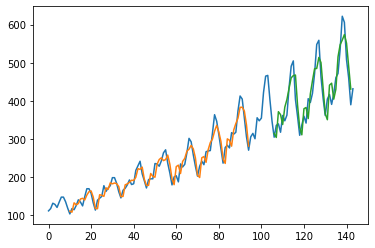




Execution (importing modules) took: 0:00:20 secs (Wall clock time)





In [15]:
import time
from datetime import timedelta

start_time = time.time()

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print(" Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

In [ ]:
Execution took: 0:00:20 secs (Wall clock time)

# Lets run again changing the look_back to 15. 

96 48
Epoch 1/200
40/40 - 1s - loss: 5537.7671 - 746ms/epoch - 19ms/step
Epoch 2/200
40/40 - 0s - loss: 1400.1443 - 70ms/epoch - 2ms/step
Epoch 3/200
40/40 - 0s - loss: 1397.1321 - 76ms/epoch - 2ms/step
Epoch 4/200
40/40 - 0s - loss: 1281.2267 - 109ms/epoch - 3ms/step
Epoch 5/200
40/40 - 0s - loss: 1360.0576 - 90ms/epoch - 2ms/step
Epoch 6/200
40/40 - 0s - loss: 1191.1892 - 76ms/epoch - 2ms/step
Epoch 7/200
40/40 - 0s - loss: 1175.0210 - 75ms/epoch - 2ms/step
Epoch 8/200
40/40 - 0s - loss: 1210.5627 - 84ms/epoch - 2ms/step
Epoch 9/200
40/40 - 0s - loss: 1022.0674 - 74ms/epoch - 2ms/step
Epoch 10/200
40/40 - 0s - loss: 1135.6404 - 67ms/epoch - 2ms/step
Epoch 11/200
40/40 - 0s - loss: 1014.5096 - 61ms/epoch - 2ms/step
Epoch 12/200
40/40 - 0s - loss: 953.6862 - 86ms/epoch - 2ms/step
Epoch 13/200
40/40 - 0s - loss: 952.9725 - 88ms/epoch - 2ms/step
Epoch 14/200
40/40 - 0s - loss: 948.2311 - 61ms/epoch - 2ms/step
Epoch 15/200
40/40 - 0s - loss: 898.4449 - 65ms/epoch - 2ms/step
Epoch 16/200
4

Epoch 127/200
40/40 - 0s - loss: 184.1120 - 79ms/epoch - 2ms/step
Epoch 128/200
40/40 - 0s - loss: 203.1607 - 71ms/epoch - 2ms/step
Epoch 129/200
40/40 - 0s - loss: 183.2647 - 71ms/epoch - 2ms/step
Epoch 130/200
40/40 - 0s - loss: 197.0549 - 64ms/epoch - 2ms/step
Epoch 131/200
40/40 - 0s - loss: 182.0042 - 67ms/epoch - 2ms/step
Epoch 132/200
40/40 - 0s - loss: 194.8831 - 70ms/epoch - 2ms/step
Epoch 133/200
40/40 - 0s - loss: 184.4278 - 72ms/epoch - 2ms/step
Epoch 134/200
40/40 - 0s - loss: 173.1971 - 70ms/epoch - 2ms/step
Epoch 135/200
40/40 - 0s - loss: 204.7213 - 73ms/epoch - 2ms/step
Epoch 136/200
40/40 - 0s - loss: 202.7867 - 65ms/epoch - 2ms/step
Epoch 137/200
40/40 - 0s - loss: 198.6300 - 65ms/epoch - 2ms/step
Epoch 138/200
40/40 - 0s - loss: 211.8424 - 64ms/epoch - 2ms/step
Epoch 139/200
40/40 - 0s - loss: 217.4115 - 65ms/epoch - 2ms/step
Epoch 140/200
40/40 - 0s - loss: 168.2361 - 64ms/epoch - 2ms/step
Epoch 141/200
40/40 - 0s - loss: 197.2081 - 77ms/epoch - 2ms/step
Epoch 142/

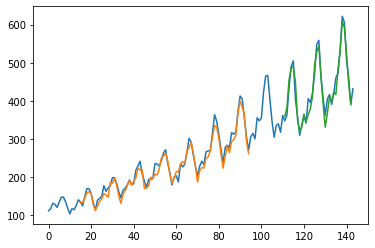




Execution (importing modules) took: 0:00:17 secs (Wall clock time)





In [20]:
import time
from datetime import timedelta

start_time = time.time()

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print(" Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Lets run again changing the look_back to 12. 

96 48
Epoch 1/200
42/42 - 1s - loss: 203742.4531 - 646ms/epoch - 15ms/step
Epoch 2/200
42/42 - 0s - loss: 68723.6719 - 98ms/epoch - 2ms/step
Epoch 3/200
42/42 - 0s - loss: 19495.3730 - 69ms/epoch - 2ms/step
Epoch 4/200
42/42 - 0s - loss: 4232.6147 - 69ms/epoch - 2ms/step
Epoch 5/200
42/42 - 0s - loss: 1241.2008 - 83ms/epoch - 2ms/step
Epoch 6/200
42/42 - 0s - loss: 1006.5753 - 101ms/epoch - 2ms/step
Epoch 7/200
42/42 - 0s - loss: 978.0748 - 67ms/epoch - 2ms/step
Epoch 8/200
42/42 - 0s - loss: 961.1594 - 62ms/epoch - 1ms/step
Epoch 9/200
42/42 - 0s - loss: 957.6467 - 81ms/epoch - 2ms/step
Epoch 10/200
42/42 - 0s - loss: 947.7528 - 86ms/epoch - 2ms/step
Epoch 11/200
42/42 - 0s - loss: 932.4262 - 73ms/epoch - 2ms/step
Epoch 12/200
42/42 - 0s - loss: 926.3755 - 71ms/epoch - 2ms/step
Epoch 13/200
42/42 - 0s - loss: 924.5337 - 94ms/epoch - 2ms/step
Epoch 14/200
42/42 - 0s - loss: 896.0075 - 79ms/epoch - 2ms/step
Epoch 15/200
42/42 - 0s - loss: 885.3113 - 76ms/epoch - 2ms/step
Epoch 16/200
42

Epoch 127/200
42/42 - 0s - loss: 252.3866 - 79ms/epoch - 2ms/step
Epoch 128/200
42/42 - 0s - loss: 247.3646 - 92ms/epoch - 2ms/step
Epoch 129/200
42/42 - 0s - loss: 242.4853 - 72ms/epoch - 2ms/step
Epoch 130/200
42/42 - 0s - loss: 243.8214 - 64ms/epoch - 2ms/step
Epoch 131/200
42/42 - 0s - loss: 232.7431 - 69ms/epoch - 2ms/step
Epoch 132/200
42/42 - 0s - loss: 230.2866 - 94ms/epoch - 2ms/step
Epoch 133/200
42/42 - 0s - loss: 258.7090 - 74ms/epoch - 2ms/step
Epoch 134/200
42/42 - 0s - loss: 234.7579 - 72ms/epoch - 2ms/step
Epoch 135/200
42/42 - 0s - loss: 247.8912 - 77ms/epoch - 2ms/step
Epoch 136/200
42/42 - 0s - loss: 253.8212 - 96ms/epoch - 2ms/step
Epoch 137/200
42/42 - 0s - loss: 243.4576 - 71ms/epoch - 2ms/step
Epoch 138/200
42/42 - 0s - loss: 246.0724 - 72ms/epoch - 2ms/step
Epoch 139/200
42/42 - 0s - loss: 244.6597 - 75ms/epoch - 2ms/step
Epoch 140/200
42/42 - 0s - loss: 242.9066 - 92ms/epoch - 2ms/step
Epoch 141/200
42/42 - 0s - loss: 261.6256 - 67ms/epoch - 2ms/step
Epoch 142/

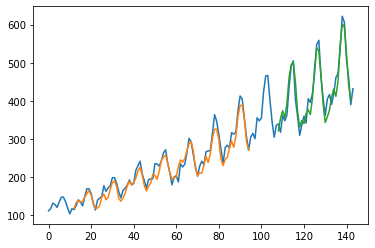




Execution (importing modules) took: 0:00:18 secs (Wall clock time)





In [21]:
import time
from datetime import timedelta

start_time = time.time()

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print(" Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

In [ ]:
Execution took: 0:00:18 secs (Wall clock time)

# Lets run again changing the look_back to 13. 

96 48
Epoch 1/200
41/41 - 1s - loss: 17647.4141 - 586ms/epoch - 14ms/step
Epoch 2/200
41/41 - 0s - loss: 3149.9927 - 65ms/epoch - 2ms/step
Epoch 3/200
41/41 - 0s - loss: 3065.2439 - 59ms/epoch - 1ms/step
Epoch 4/200
41/41 - 0s - loss: 2996.9651 - 66ms/epoch - 2ms/step
Epoch 5/200
41/41 - 0s - loss: 2912.7520 - 81ms/epoch - 2ms/step
Epoch 6/200
41/41 - 0s - loss: 2746.1472 - 65ms/epoch - 2ms/step
Epoch 7/200
41/41 - 0s - loss: 2719.8423 - 59ms/epoch - 1ms/step
Epoch 8/200
41/41 - 0s - loss: 2613.8857 - 70ms/epoch - 2ms/step
Epoch 9/200
41/41 - 0s - loss: 2537.7639 - 99ms/epoch - 2ms/step
Epoch 10/200
41/41 - 0s - loss: 2391.2703 - 73ms/epoch - 2ms/step
Epoch 11/200
41/41 - 0s - loss: 2291.8098 - 67ms/epoch - 2ms/step
Epoch 12/200
41/41 - 0s - loss: 2328.6367 - 67ms/epoch - 2ms/step
Epoch 13/200
41/41 - 0s - loss: 2137.3279 - 86ms/epoch - 2ms/step
Epoch 14/200
41/41 - 0s - loss: 2013.3281 - 69ms/epoch - 2ms/step
Epoch 15/200
41/41 - 0s - loss: 1968.4408 - 62ms/epoch - 2ms/step
Epoch 16/2

Epoch 126/200
41/41 - 0s - loss: 274.8809 - 60ms/epoch - 1ms/step
Epoch 127/200
41/41 - 0s - loss: 273.5707 - 66ms/epoch - 2ms/step
Epoch 128/200
41/41 - 0s - loss: 253.0319 - 87ms/epoch - 2ms/step
Epoch 129/200
41/41 - 0s - loss: 249.7392 - 67ms/epoch - 2ms/step
Epoch 130/200
41/41 - 0s - loss: 270.1026 - 62ms/epoch - 2ms/step
Epoch 131/200
41/41 - 0s - loss: 261.5965 - 59ms/epoch - 1ms/step
Epoch 132/200
41/41 - 0s - loss: 247.8480 - 73ms/epoch - 2ms/step
Epoch 133/200
41/41 - 0s - loss: 246.3900 - 72ms/epoch - 2ms/step
Epoch 134/200
41/41 - 0s - loss: 254.7083 - 63ms/epoch - 2ms/step
Epoch 135/200
41/41 - 0s - loss: 249.1346 - 65ms/epoch - 2ms/step
Epoch 136/200
41/41 - 0s - loss: 247.8856 - 75ms/epoch - 2ms/step
Epoch 137/200
41/41 - 0s - loss: 257.6480 - 85ms/epoch - 2ms/step
Epoch 138/200
41/41 - 0s - loss: 257.7719 - 67ms/epoch - 2ms/step
Epoch 139/200
41/41 - 0s - loss: 266.4055 - 63ms/epoch - 2ms/step
Epoch 140/200
41/41 - 0s - loss: 256.4352 - 65ms/epoch - 2ms/step
Epoch 141/

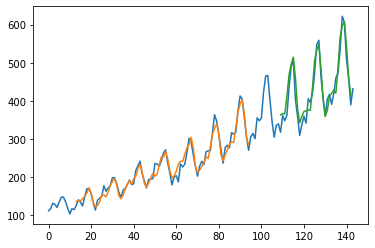




Execution (importing modules) took: 0:00:17 secs (Wall clock time)





In [22]:
import time
from datetime import timedelta

start_time = time.time()

# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' , skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 13
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print(" Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

In [ ]:
Execution took: 0:00:17 secs (Wall clock time)

# Summary

# Next